In [1]:
import time
from matplotlib import pyplot as plt
import numpy as np
import pyvisa as visa
import pandas as pd

In [3]:
rm  = visa.ResourceManager()
rm.list_resources()

resource_name = 'USB0::0x0699::0x0363::C102220::INSTR'

# Creamos ol objeto "osci" que nos permite comunicarnos con el instrumento
osci= rm.open_resource(resource_name)

# Pedimos la identificación del equipo
print(osci.query('*IDN?'))

# Activo modo de transmision: Binario
osci.write('DAT:ENC RPB')
osci.write('DAT:WID 1')

#decidimos en que canal trabajar 
canal   = 2 #or 1
osci.write(f'DATA:SOU {canal}')

TEKTRONIX,TDS 1002B,C102220,CF:91.1CT FV:v22.11



In [5]:
datos_y = osci.query_binary_values('CURV?', datatype='B', container=np.array)
xze, xin, yze, ymu, yoff = osci.query_ascii_values('WFMPRE:XZE?;XIN?;YZE?;YMU?;YOFF?;', separator=';')


TEKTRONIX,TDS 1002B,C102220,CF:91.1CT FV:v22.11



# plotting the data from oscilloscope

In [7]:
datos_y = osci.query_binary_values('CURV?', datatype='B', container=np.array)

volts   = (datos_y-yoff)*ymu+yze;
tiempo  = xze + np.arange(len(datos_y)) * xin

plt.plot(  tiempo, volts )
plt.xlabel('Tiempo [s]' )
plt.ylabel('Voltaje [V]')

Text(0, 0.5, 'Voltaje [V]')

# transforming the data to pandas dataframe

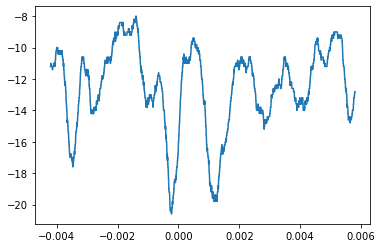

In [46]:
data = {'t':tiempo , 'v':volts}
df = pd.DataFrame(data)
df.to_csv('1Mohm_6.0(3)v')
plt.plot(df["t"],df["v"])

# measurments of many screens of the oscilloscope

In [ ]:
xze, xin, yze, ymu, yoff = osci.query_ascii_values('WFMPRE:XZE?;XIN?;YZE?;YMU?;YOFF?;', separator=';')

##########################
# ATENCIÓN!              #
##########################

# cáda vez que cambien las escalas del osciloscopio van a tener que volver
# a levantar xze, xin, yze, ymu, yoff  !!!

for i in range(0,5000):
# Adquiere los datos del canal 1 y los devuelve en un array de numpy
    datos_y = osci.query_binary_values('CURV?', datatype='B', container=np.array)

    volts   = (datos_y-yoff)*ymu+yze;
    tiempo  = xze + np.arange(len(datos_y)) * xin    
    
    data = {'t':tiempo , 'v':volts} #to dictionary
    df = pd.DataFrame(data) #to dataframe
    df.to_csv(f'conteo_discoquieto_50ohm_25micros/conteo_1.2v_10micros_{i}.txt' )#to .csv file
